In [12]:
#pip install seaborn #maybe needed in your case as it was in mine

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns # Seaborn for data visualization library based on matplotlib.

from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.naive_bayes import *
from sklearn.neighbors import *
from sklearn.metrics import accuracy_score
from sklearn import neighbors # added
from mlxtend.plotting import plot_decision_regions # added
import matplotlib.pyplot as plt #added

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

#for Decision tree
from sklearn import tree
from sklearn.tree import plot_tree

# Load the data.
#dataset = pd.read_csv('datasets/network-logs.csv')
dataset = pd.read_csv('datasets/R2L-data.csv')

In [97]:
#summary of the dataframe
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   duration              970 non-null    int64  
 1   numfailedlogins       970 non-null    int64  
 2   dsthostsrvrerrorrate  970 non-null    float64
 3   attack                970 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 30.4 KB
None


In [98]:
#summary of dataset for columns, count, min, max values
print(dataset.describe())

           duration  numfailedlogins  dsthostsrvrerrorrate      attack
count    970.000000       970.000000             970.00000  970.000000
mean    2776.855670         0.123711               0.11534    0.054639
std     5259.827595         0.451068               0.25103    0.227392
min        0.000000         0.000000               0.00000    0.000000
25%        6.000000         0.000000               0.00000    0.000000
50%       42.000000         0.000000               0.00000    0.000000
75%      747.750000         0.000000               0.10000    0.000000
max    40504.000000         5.000000               1.00000    1.000000


In [99]:
# Total count and columns
print(dataset.shape)

(970, 4)


In [100]:
#check for NULL values
print(dataset.isnull().sum())

duration                0
numfailedlogins         0
dsthostsrvrerrorrate    0
attack                  0
dtype: int64


<Axes: >

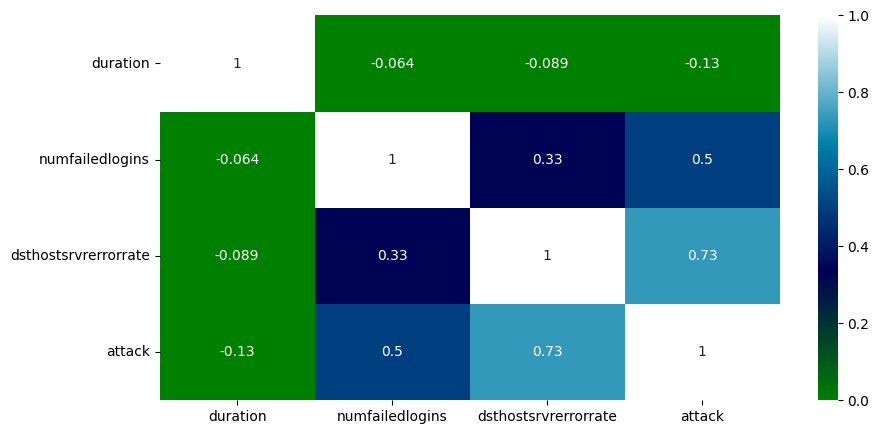

In [101]:
# Plot the heatmap so that the values are shown.
plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(),annot=True,vmin=0,vmax=1,cmap='ocean')

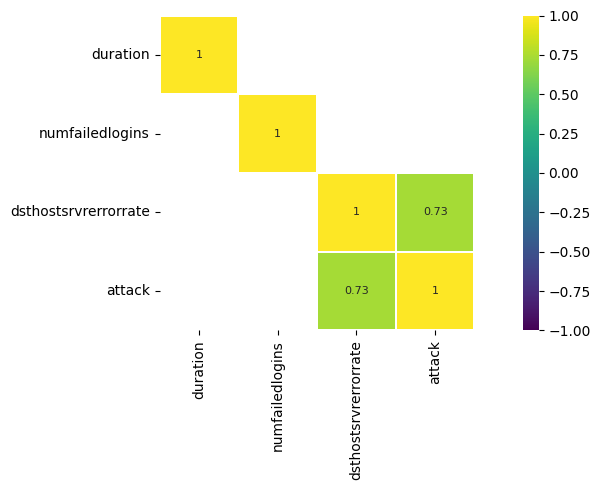

None

In [102]:
#create a correlation matrix
corr = dataset.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.7)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
plt.tight_layout()
display(plt.show())

In [103]:
print(dataset.corr())

                      duration  numfailedlogins  dsthostsrvrerrorrate  \
duration              1.000000        -0.064346             -0.088839   
numfailedlogins      -0.064346         1.000000              0.326091   
dsthostsrvrerrorrate -0.088839         0.326091              1.000000   
attack               -0.126863         0.497470              0.731965   

                        attack  
duration             -0.126863  
numfailedlogins       0.497470  
dsthostsrvrerrorrate  0.731965  
attack                1.000000  


<Axes: >

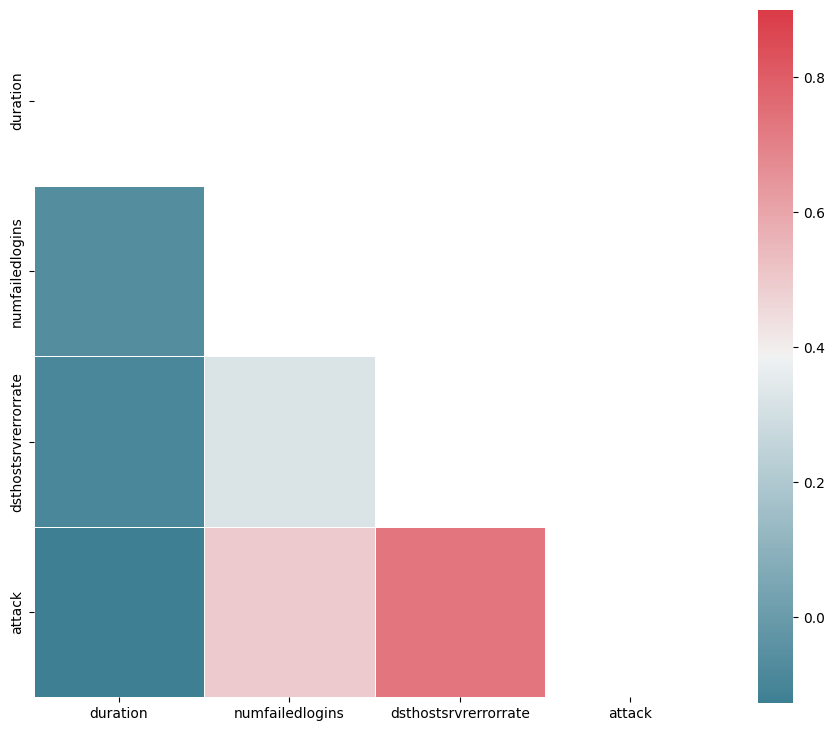

In [104]:
### Visualize Correlation

# Generate a mask for the upper triangle
mask = np.zeros_like(dataset.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(dataset.corr(), mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)

In [105]:
samples = dataset.iloc[:, [0,1,2]].values
targets = dataset['attack'].values

In [106]:
training_samples, testing_samples, training_targets, testing_targets = train_test_split(
         samples, targets, test_size=0.3, random_state=0)

In [107]:
# k-Nearest Neighbors model
knc = KNeighborsClassifier(n_neighbors=2)
knc.fit(training_samples,training_targets)
knc_prediction = knc.predict(testing_samples)
knc_accuracy = 100.0 * accuracy_score(testing_targets, knc_prediction)
print ("K-Nearest Neighbours accuracy: " + str(knc_accuracy))
#print(testing_targets)
#print(knc_prediction)
print("Actual accuracy:" + str(compare_results(knc_prediction, testing_targets)))

K-Nearest Neighbours accuracy: 98.96907216494846
Correct Predictions:288
Incorrect Predictions:3
Actual accuracy:98.96907216494846


In [108]:
def knn_comparison(data, k):
 x = data[['numfailedlogins', 'dsthostsrvrerrorrate']].values
 y = data['attack'].astype(int).values
 clf = neighbors.KNeighborsClassifier(n_neighbors=k)
 clf.fit(x, y)
# Plotting decision region
 plot_decision_regions(x, y, clf=clf, legend=1)
# Adding axes annotations
 plt.xlabel('numfailedlogins')
 plt.ylabel('dsthostsrvrerrorrate')
 plt.title('Knn with K='+ str(k))
 plt.show()

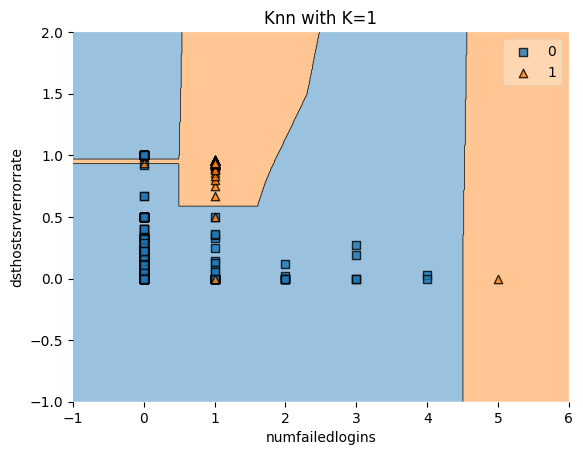

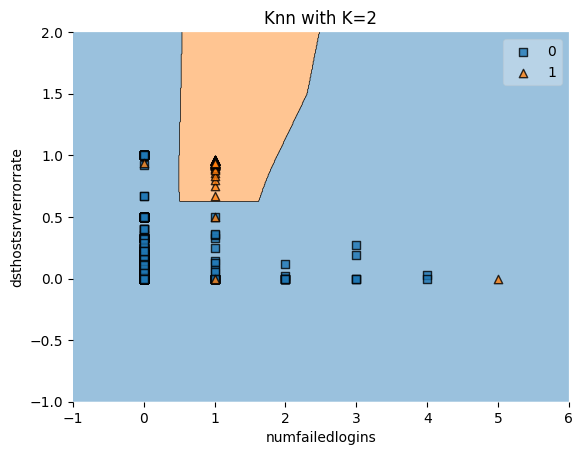

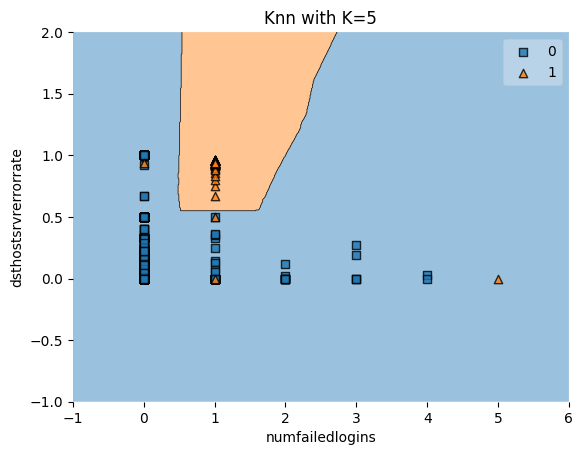

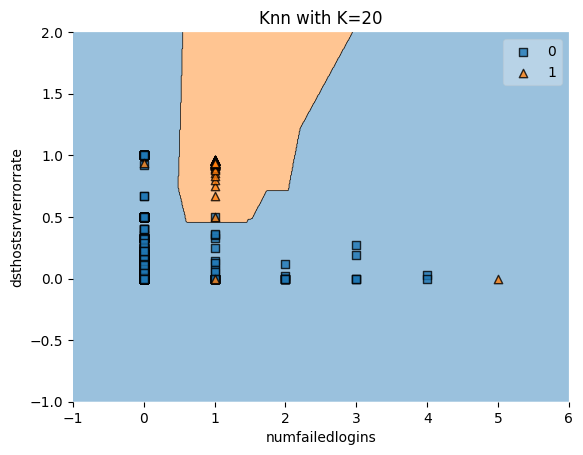

In [109]:
for i in [1,2,5,20]:
    knn_comparison(dataset, i)

In [110]:
def compare_results(predicted_results, actual_results):
    count = 0
    mistake = 0
    
    for i in range(len(predicted_results)):
        if predicted_results[i] == actual_results[i]:
            #print(f"Index {i}: Prediction is correct")
            count += 1
        else:
            #print(f"Index {i}: Prediction is incorrect")
            mistake += 1 

    print("Correct Predictions:" + str(count))
    print("Incorrect Predictions:" + str(mistake))
    accuracy = count * 100 /len(predicted_results)
    return accuracy

In [111]:
print("Predicted results:" + str(knc_prediction))
print("Actual results   :" + str(testing_targets))
print("Actual accuracy:" + str(compare_results(knc_prediction, testing_targets)))

Predicted results:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual results   :[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [112]:
# Decision tree model

dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(training_samples,training_targets)
dtc_prediction = dtc.predict(testing_samples)
dtc_accuracy = 100.0 * accuracy_score(testing_targets, dtc_prediction)
print ("Decision Tree accuracy: " + str(dtc_accuracy))
print(testing_targets)
print(dtc_prediction)
print("Actual accuracy:" + str(compare_results(dtc_prediction, testing_targets)))

Decision Tree accuracy: 97.9381443298969
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0

In [113]:
text_tree = tree.export_text(dtc)
print(text_tree)

|--- feature_2 <= 0.59
|   |--- feature_1 <= 4.00
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.50
|   |   |   |--- feature_0 <= 9.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  9.50
|   |   |   |   |--- feature_0 <= 131.00
|   |   |   |   |   |--- feature_0 <= 49.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  49.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  131.00
|   |   |   |   |   |--- class: 0
|   |--- feature_1 >  4.00
|   |   |--- class: 1
|--- feature_2 >  0.59
|   |--- feature_2 <= 0.98
|   |   |--- class: 1
|   |--- feature_2 >  0.98
|   |   |--- class: 0



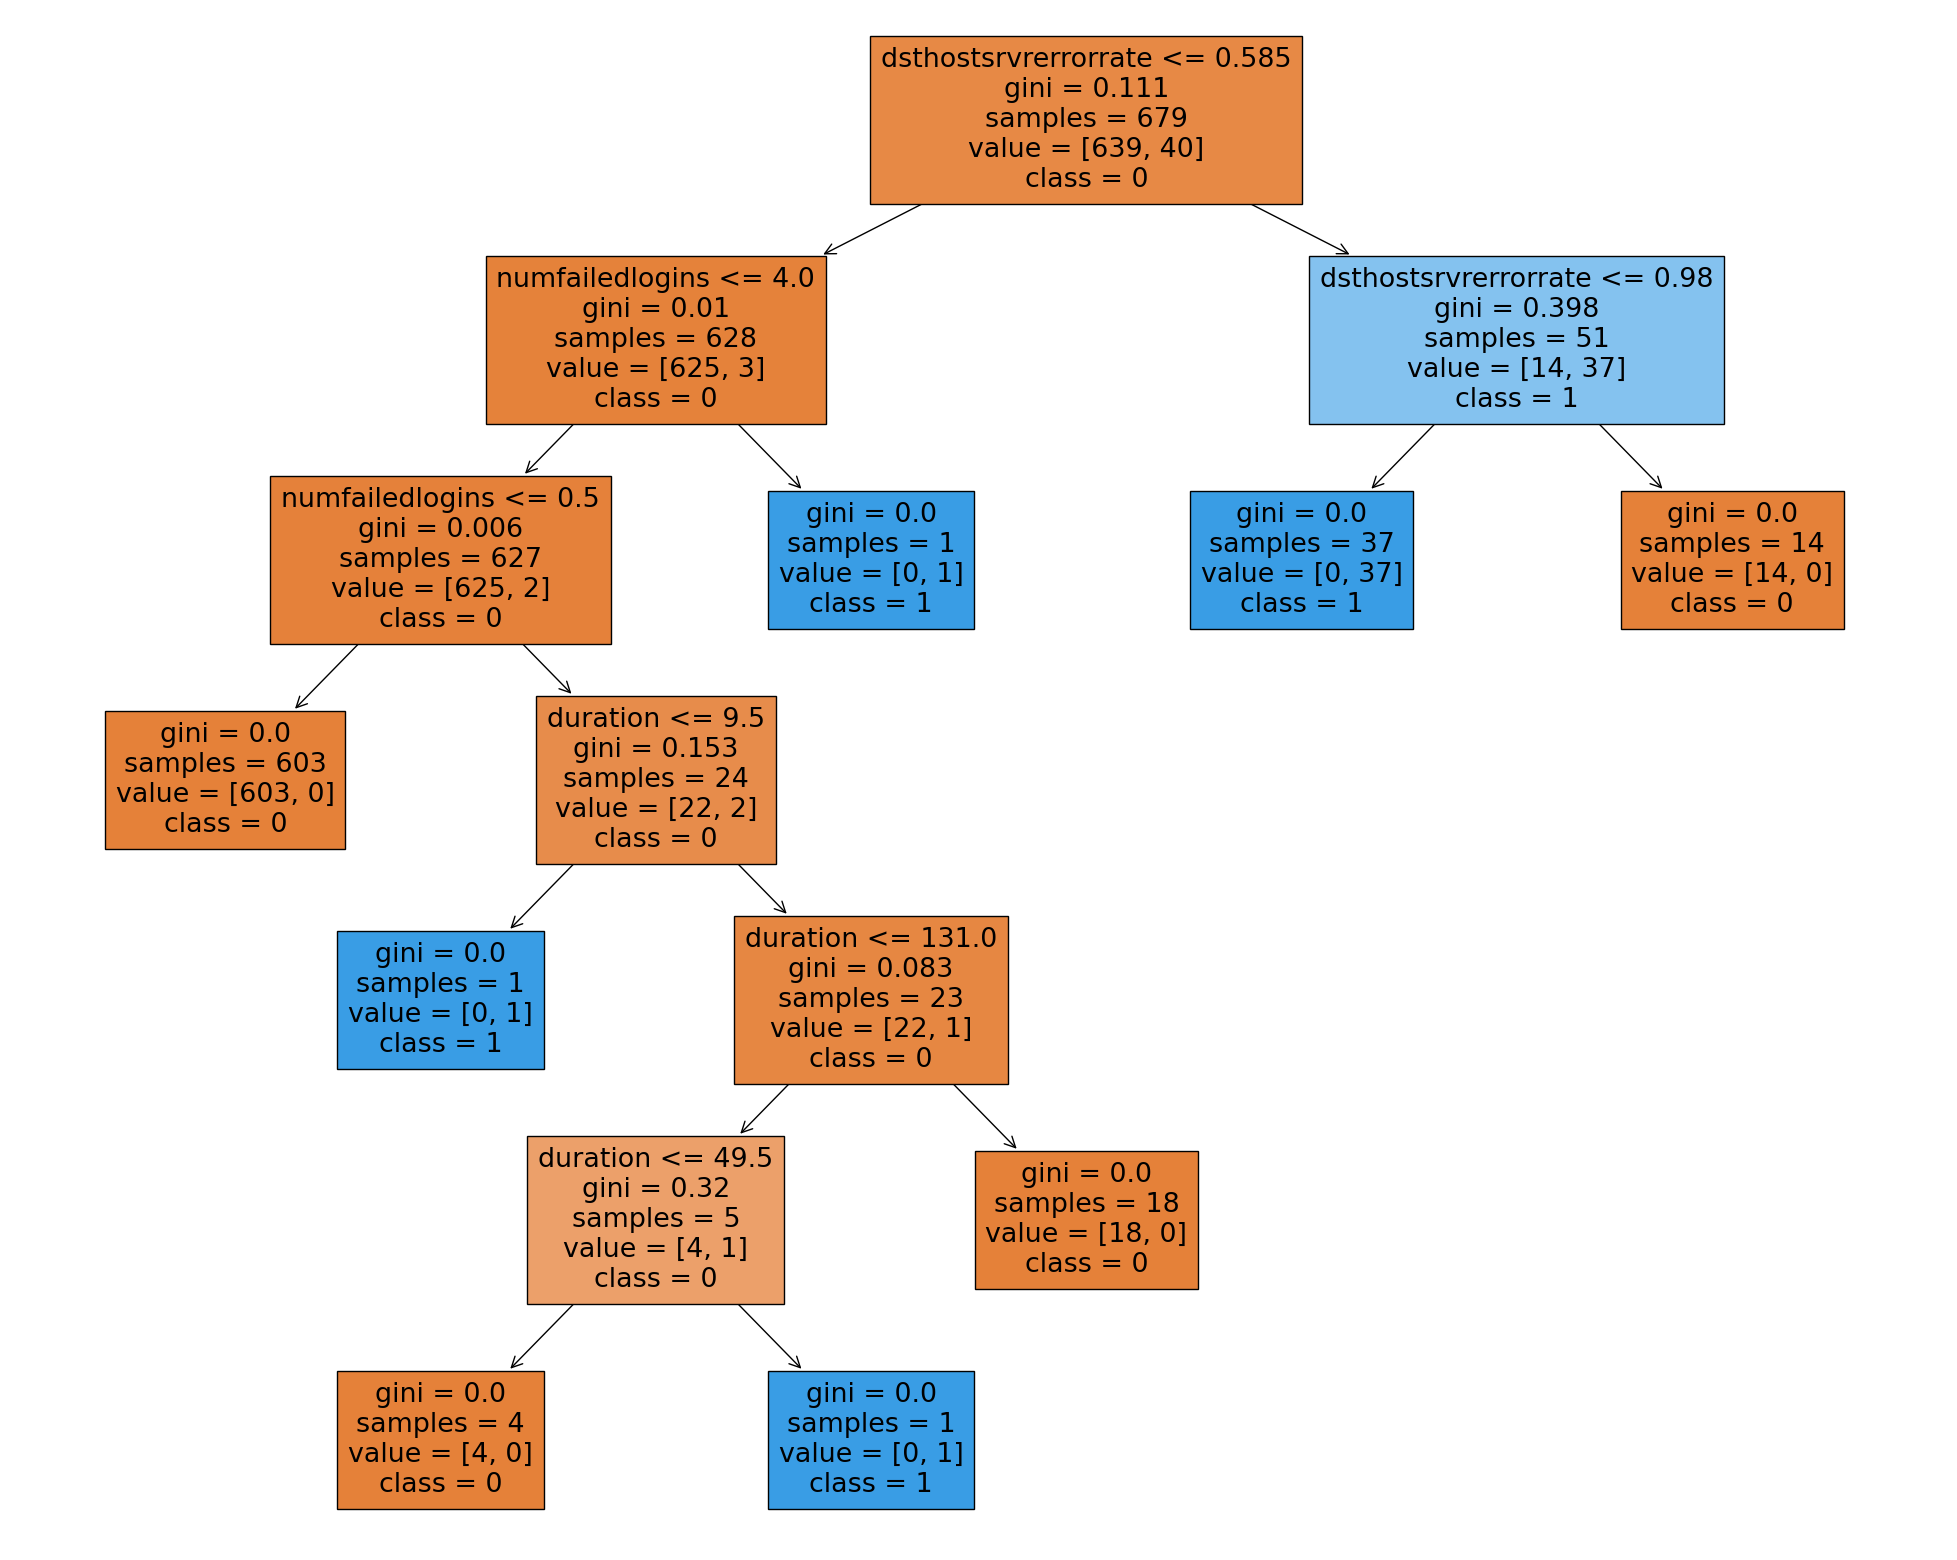

In [114]:
# Convert class names to strings
class_names_str = np.unique(dtc_prediction).astype(str)

# Visualization
fig = plt.figure(figsize=(25, 20))
_ = plot_tree(dtc, 
                   feature_names=['duration','numfailedlogins', 'dsthostsrvrerrorrate'],
                   class_names=class_names_str,
                   filled=True)

plt.show()

In [115]:
# Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(training_samples,training_targets)
gnb_prediction = gnb.predict(testing_samples)
gnb_accuracy = 100.0 * accuracy_score(testing_targets, gnb_prediction)
print ("Gaussian Naive Bayes accuracy: " + str(gnb_accuracy))
print(testing_targets)
print(gnb_prediction)
print("Actual accuracy:" + str(compare_results(gnb_prediction, testing_targets)))

Gaussian Naive Bayes accuracy: 94.84536082474226
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [116]:
print("Naive Bayes score: ",100 * gnb.score(testing_samples, testing_targets))

Naive Bayes score:  94.84536082474226


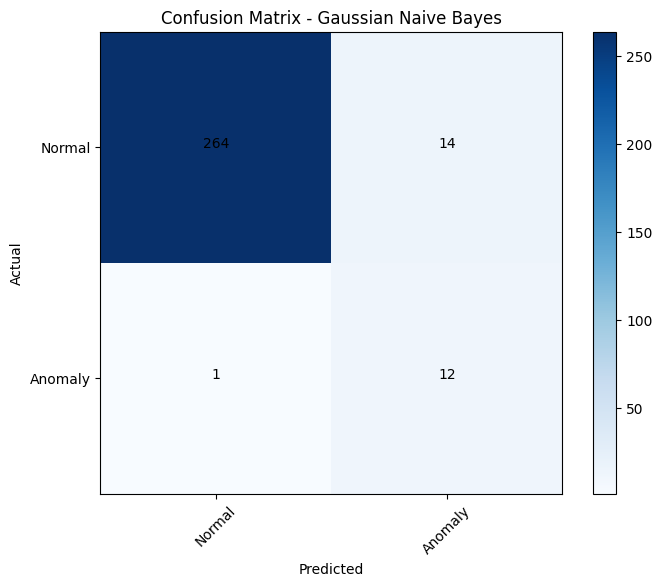

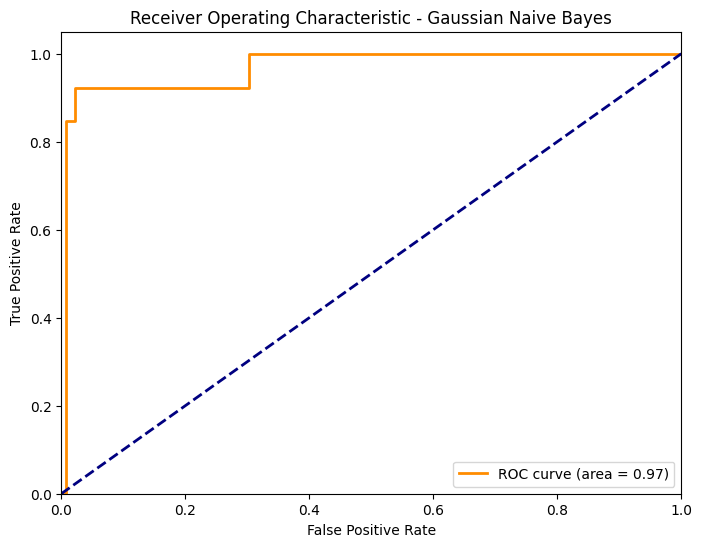

In [117]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix
conf_matrix_gnb = confusion_matrix(testing_targets, gnb_prediction)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_gnb, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.colorbar()

classes = ['Normal', 'Anomaly']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix_gnb[i, j]), horizontalalignment="center", color="black")


plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
gnb_probs = gnb.predict_proba(testing_samples)[:, 1]
fpr, tpr, thresholds = roc_curve(testing_targets, gnb_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Gaussian Naive Bayes')
plt.legend(loc='lower right')
plt.show()
